In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def generate_confusion_matrix(classes, size):
    matrix = np.random.randint(0, 100, size=(classes, classes))
    return matrix

In [4]:
def plot_confusion_matrix(matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Previsto')
    plt.ylabel('Atual')
    plt.title('Matriz de Confusao')
    plt.show()

Matriz de Confusao Gerada:
[[99 10 54 32]
 [80 85  7 65]
 [49 45 10 19]
 [61  0 99 74]]


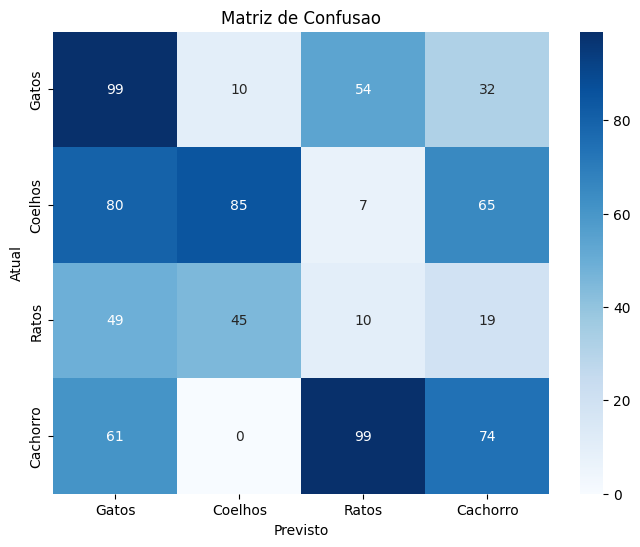

In [18]:

class_names = ['Gatos', 'Coelhos', 'Ratos', 'Cachorro']
matrix = generate_confusion_matrix(len(class_names), (len(class_names), len(class_names)))
print("Matriz de Confusao Gerada:")
print(matrix)
plot_confusion_matrix(matrix, class_names)


In [27]:
import numpy as np

def calcular_sensibilidade(matriz_confusao):
    sensibilidades = []
    num_classes = matriz_confusao.shape[0]

    for i in range(num_classes):
        vp = matriz_confusao[i, i]
        fn = sum(matriz_confusao[i, :]) - vp
        if (vp + fn) == 0:
            sensibilidades.append(0)  # nao dividir por zero
        else:
            sensibilidade = vp / (vp + fn)
            sensibilidades.append(sensibilidade)

    return sensibilidades



In [52]:
def calcular_especificidade(matriz_confusao):
    especificidades = []
    num_classes = matriz_confusao.shape[0]

    for i in range(num_classes):
        vn = np.sum(np.delete(np.delete(matriz_confusao, i, axis=0), i, axis=1))
        fp = np.sum(np.delete(matriz_confusao[:, i], i))
        if (vn + fp) == 0:
            especificidades.append(0)  # nao dividir por zero
        else:
            especificidade = vn / (vn + fp)
            especificidades.append(especificidade)
    return especificidades



In [54]:
def calcular_acuracia(matriz_confusao):
    vp_vn = np.trace(matriz_confusao)  # Soma dos VP e VN
    n = np.sum(matriz_confusao)  # Total de exemplos
    acuracia = vp_vn / n
    return acuracia


In [59]:
def calcular_precisao(matriz_confusao):
    num_classes = matriz_confusao.shape[0]
    precisoes = []

    for i in range(num_classes):
        vp = matriz_confusao[i, i]
        fp = sum(matriz_confusao[:, i]) - vp
        if (vp + fp) == 0:
            precisoes.append(0)  # nao dividir por zero
        else:
            precisao = vp / (vp + fp)
            precisoes.append(precisao)

    return precisoes



In [62]:
def calcular_f1_score(precisoes, sensibilidades):
    f1_scores = []
    for p, s in zip(precisoes, sensibilidades):
        if (p + s) == 0:
            f1_scores.append(0)  # Evita divisão por zero
        else:
            f1 = 2 * (p * s) / (p + s)
            f1_scores.append(f1)

    return f1_scores


In [63]:
sensibilidades = calcular_sensibilidade(matrix)
for i, sensibilidade in enumerate(sensibilidades):
    print(f'Sensibilidade da Classe {i}: {sensibilidade:.2f}')

especificidades = calcular_especificidade(matrix)
for i, especificidade in enumerate(especificidades):
    print(f'Especificidade da Classe {i}: {especificidade:.2f}')

acuracia = calcular_acuracia(matrix)
print(f'Acurácia: {acuracia:.2f}')

precisoes = calcular_precisao(matrix)
for i, precisao in enumerate(precisoes):
    print(f'Precisão da Classe {i}: {precisao:.2f}')

f1_scores = calcular_f1_score(precisoes, sensibilidades)
for i, f1 in enumerate(f1_scores):
    print(f'F1-Score da Classe {i}: {f1:.2f}')

Sensibilidade da Classe 0: 0.51
Sensibilidade da Classe 1: 0.36
Sensibilidade da Classe 2: 0.08
Sensibilidade da Classe 3: 0.32
Especificidade da Classe 0: 0.68
Especificidade da Classe 1: 0.90
Especificidade da Classe 2: 0.76
Especificidade da Classe 3: 0.79
Acurácia: 0.34
Precisão da Classe 0: 0.34
Precisão da Classe 1: 0.61
Precisão da Classe 2: 0.06
Precisão da Classe 3: 0.39
F1-Score da Classe 0: 0.41
F1-Score da Classe 1: 0.45
F1-Score da Classe 2: 0.07
F1-Score da Classe 3: 0.35
